In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("D:/SEMESTER 4/Penambangan Data dan Analisis Bisnis/New folder/titanic_data.csv")

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1. *Eksplorasi Awal*

##### a. Berapa Jumlah total penumpang yang ada?

In [7]:
total_passengers = len(data)
print("Total passengers:", total_passengers)

Total passengers: 889


##### b. Berapa jumlah penumpang yang selamat dan tidak selamat?

In [9]:
survival_counts = data['survived'].value_counts()
survived = survival_counts[1]
not_survived = survival_counts[0]
print("Survived:", survived)
print("Not Survived:", not_survived)    

Survived: 342
Not Survived: 547


##### c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua?

In [15]:
average_age = data['age'].mean()
youngest_passenger = data.loc[data['age'].idxmin()]
oldest_passenger = data.loc[data['age'].idxmax()]
print("Rata-rata umur penumpang:", average_age)
print("Penumpang termuda adalah yang bercirikan data berikut: \n", youngest_passenger)
print("Penumpang tertua adalah yang bercirikan data berikut: \n", oldest_passenger)

Rata-rata umur penumpang: 29.69869565217391
Penumpang termuda adalah yang bercirikan data berikut: 
 survived               1
pclass                 3
sex                 male
age                 0.42
sibsp                  0
parch                  1
fare              8.5167
embarked               C
class              Third
who                child
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone              False
Name: 801, dtype: object
Penumpang tertua adalah yang bercirikan data berikut: 
 survived                 1
pclass                   1
sex                   male
age                   80.0
sibsp                    0
parch                    0
fare                  30.0
embarked                 S
class                First
who                    man
adult_male            True
deck                     A
embark_town    Southampton
alive                  yes
alone                 True
Name: 628, dtype: object


##### d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualkan

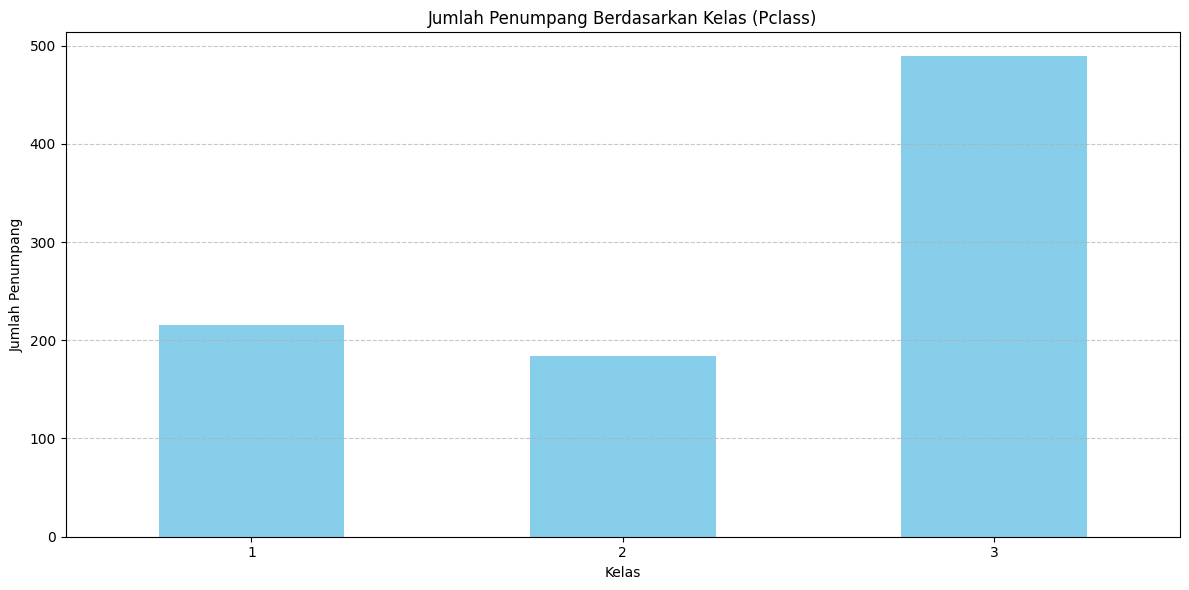

In [18]:
pclass_counts = data['pclass'].value_counts().sort_index()
percent_class_1 = (pclass_counts[1] / total_passengers) * 100

# Visualisasi jumlah penumpang berdasarkan kelas
plt.figure(figsize=(12, 6))
pclass_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penumpang Berdasarkan Kelas (Pclass)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
{
    "Total Penumpang": total_passengers,
    "Jumlah Selamat": survived,
    "Jumlah Tidak Selamat": not_survived,
    "Rata-rata Umur": round(average_age, 2),
    "Penumpang Termuda": {
        "Nama": youngest_passenger['who'],
        "Umur": youngest_passenger['age']
    },
    "Penumpang Tertua": {
        "Nama": oldest_passenger['who'],
        "Umur": oldest_passenger['age']
    },
    "Jumlah per Kelas": pclass_counts.to_dict(),
    "Persentase Kelas 1": round(percent_class_1, 2)
}

{'Total Penumpang': 889,
 'Jumlah Selamat': 342,
 'Jumlah Tidak Selamat': 547,
 'Rata-rata Umur': 29.7,
 'Penumpang Termuda': {'Nama': 'child', 'Umur': 0.42},
 'Penumpang Tertua': {'Nama': 'man', 'Umur': 80.0},
 'Jumlah per Kelas': {1: 216, 2: 184, 3: 489},
 'Persentase Kelas 1': 24.3}

### 2. *Pre-Processing*:

In [20]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
data.drop(columns=['deck', 'adult_male', 'alive'], inplace=True)

menghapus kolom tersebut karena:

> *deck* : sebagian besar nilainya adalah NaN

> *adult_male* : feature ini mengacu pada kolom yang sudah ada

> *alive* : feature ini mengacu pada kolom yang sudah ada dalam dataset

##### a. Apakah terdapat missing value pada data tersebut?

Handling Missing Value

In [ ]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
embark_town      2
alone            0
dtype: int64

##### b. Jika ya, apa anda dilakukan?

In [23]:
# Menangani data kosong pada feature age dengan imputasi mean
data['age'] = data['age'].fillna(np.mean(data['age']))

In [25]:
# Menghapus nilai kosong dalam 'embarked'
data.dropna(subset=['embarked'], inplace=True)

In [26]:
# Menghapus nilai kosong dalam 'embark_town'
data.dropna(subset=['embark_town'], inplace=True)

In [27]:
# Mengecek ulang nilai kosong dalam dataset
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alone          0
dtype: int64

##### c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier!

Boxplot untuk cek outlier

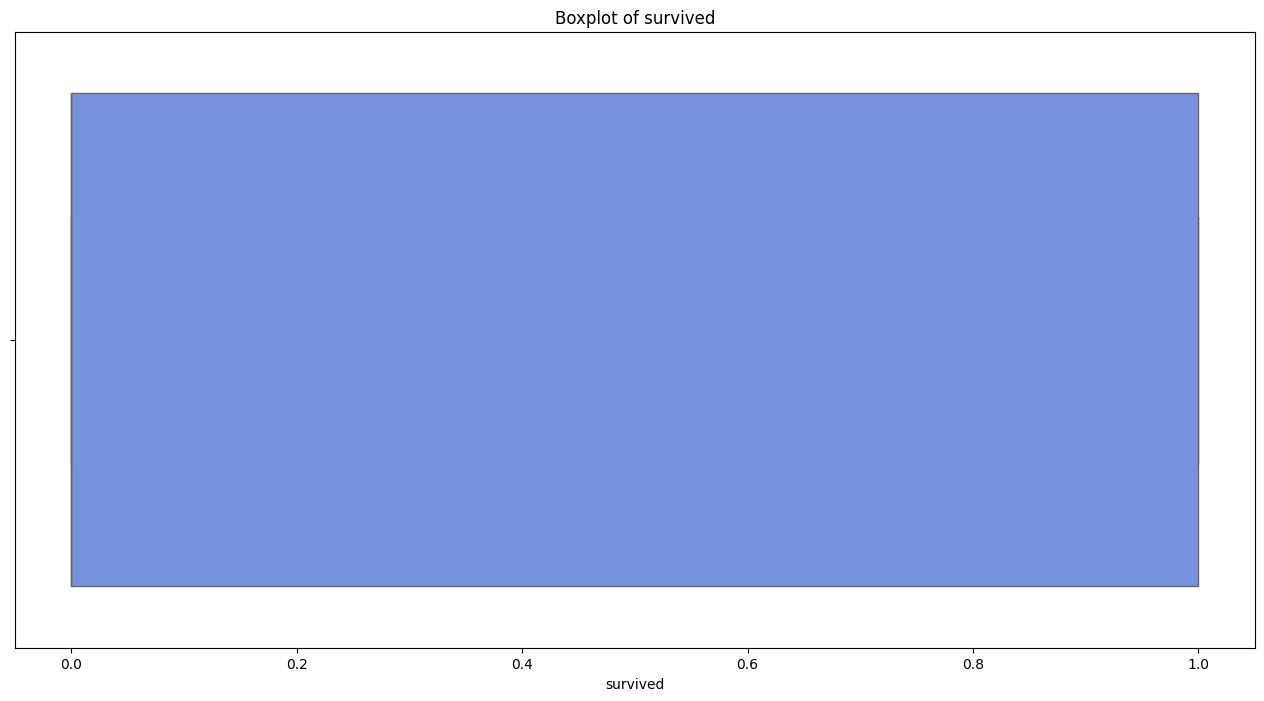

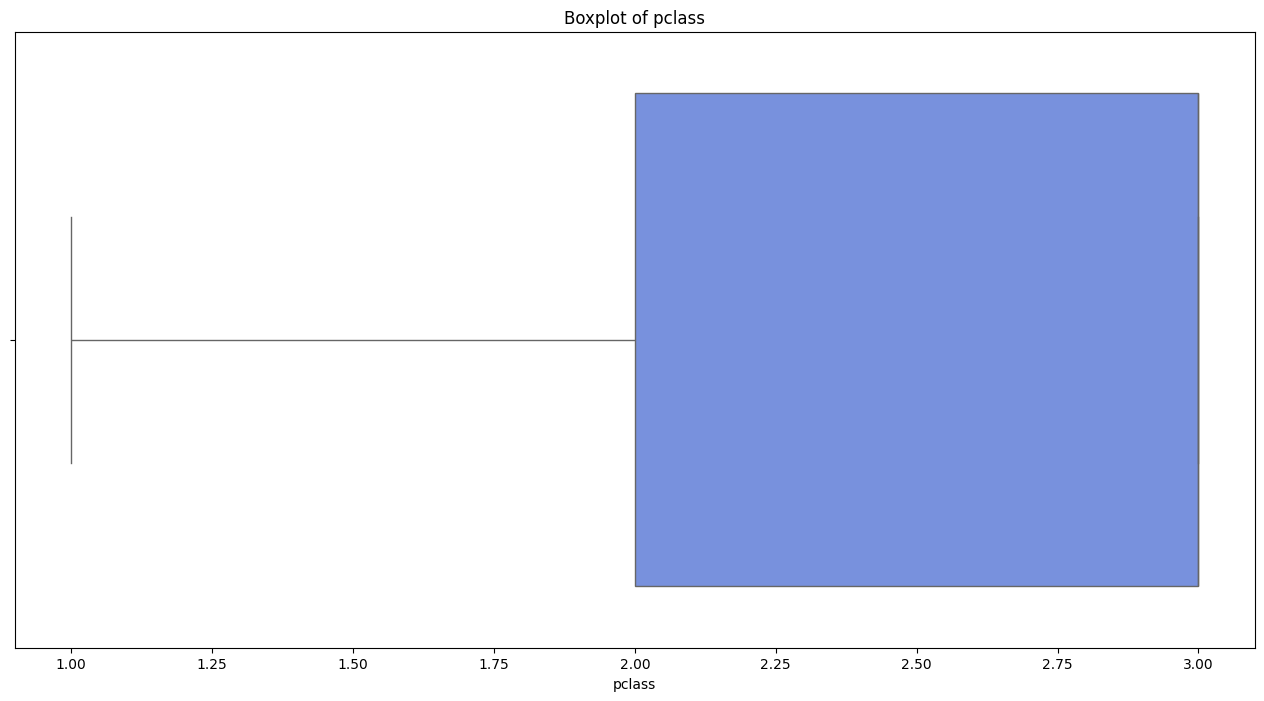

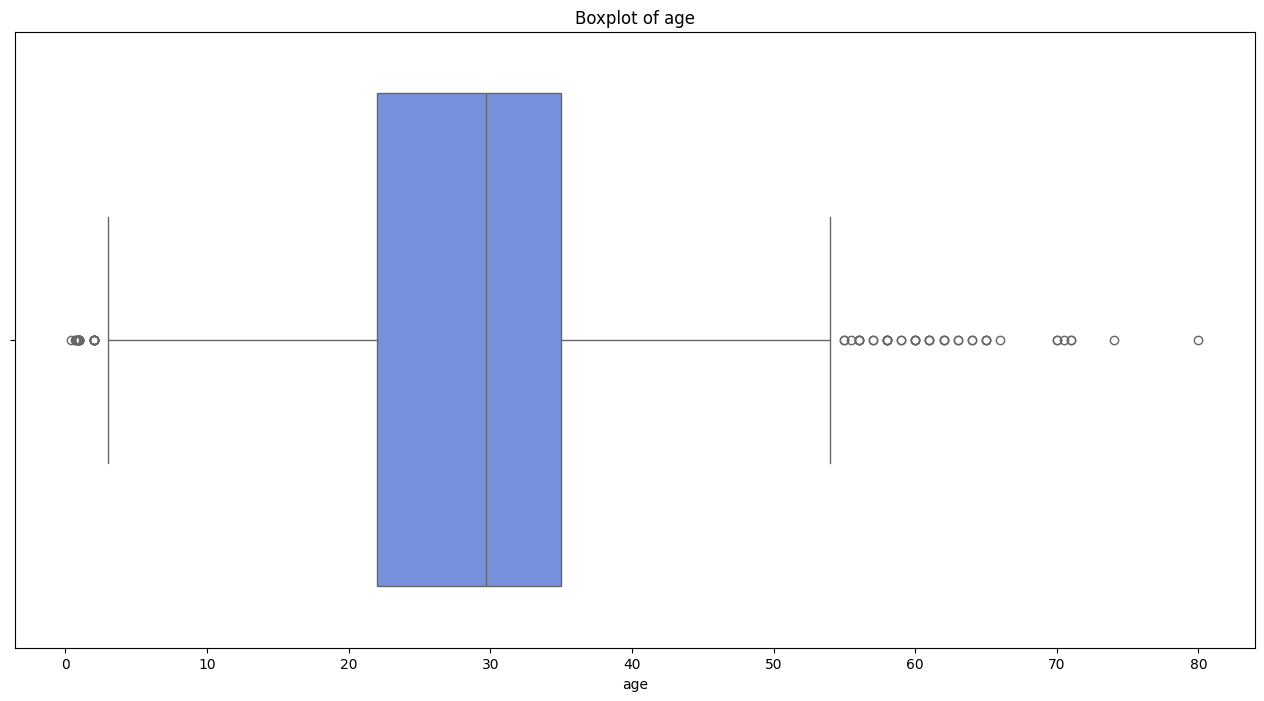

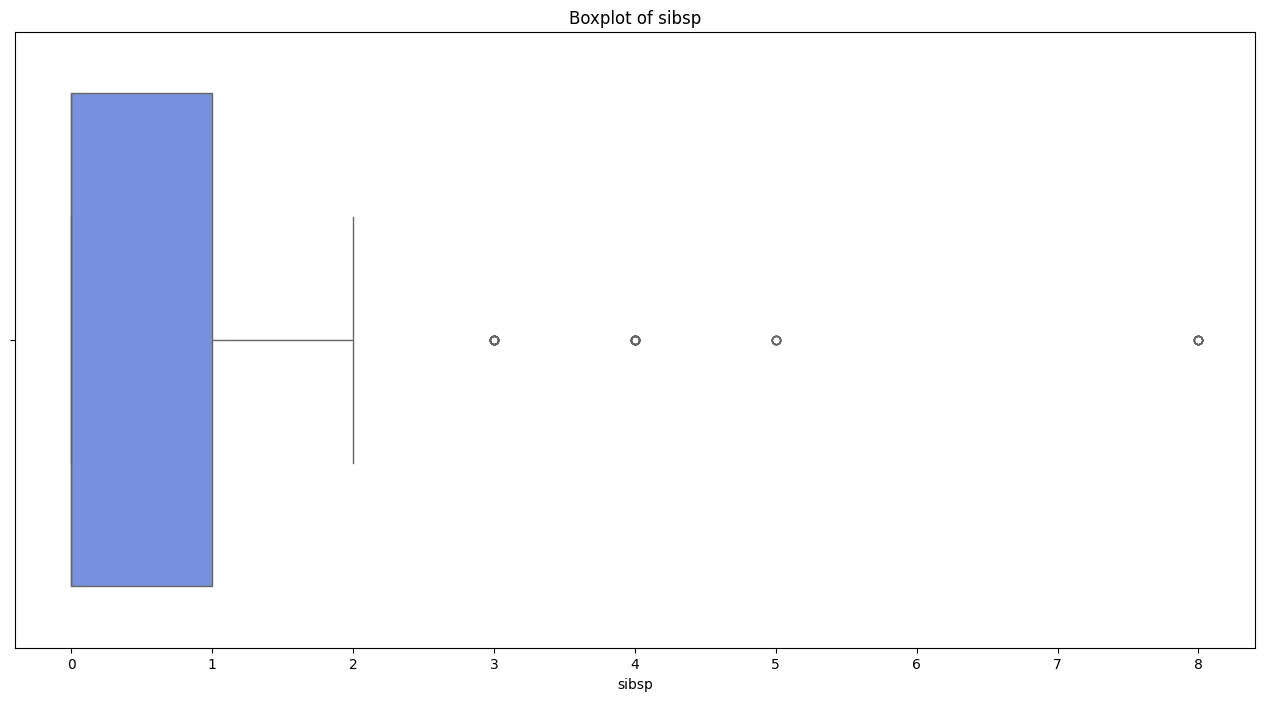

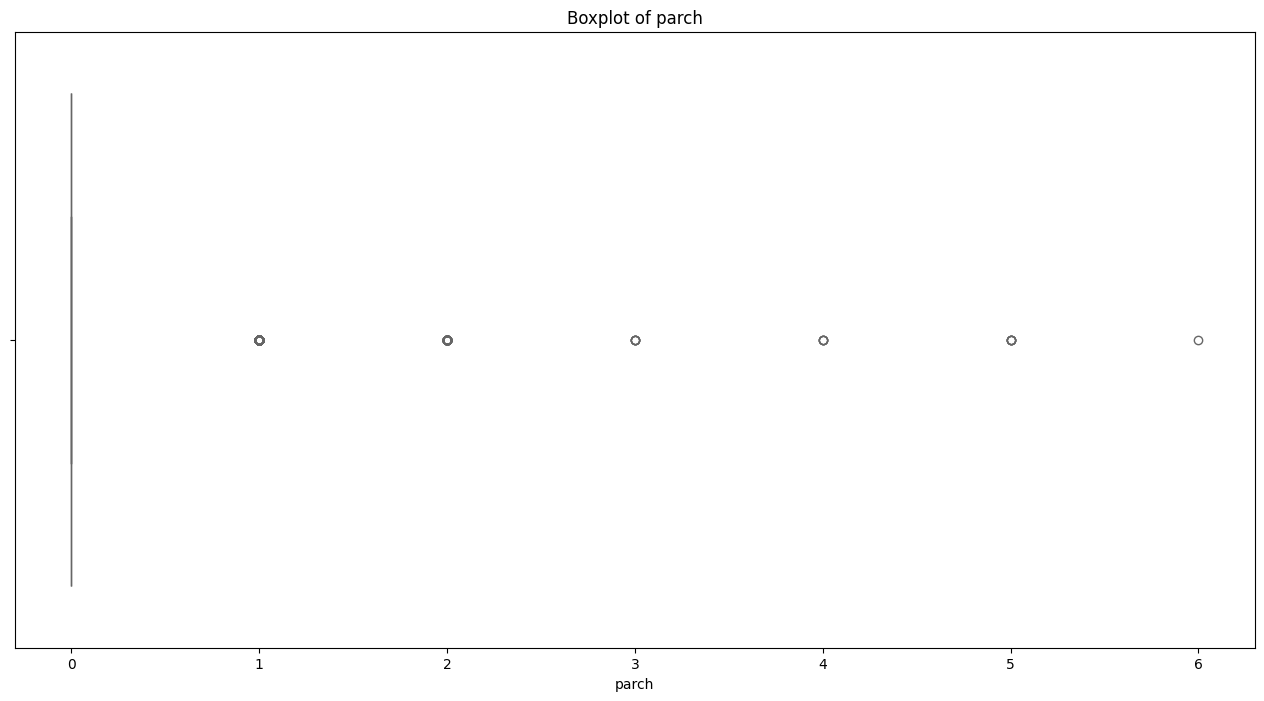

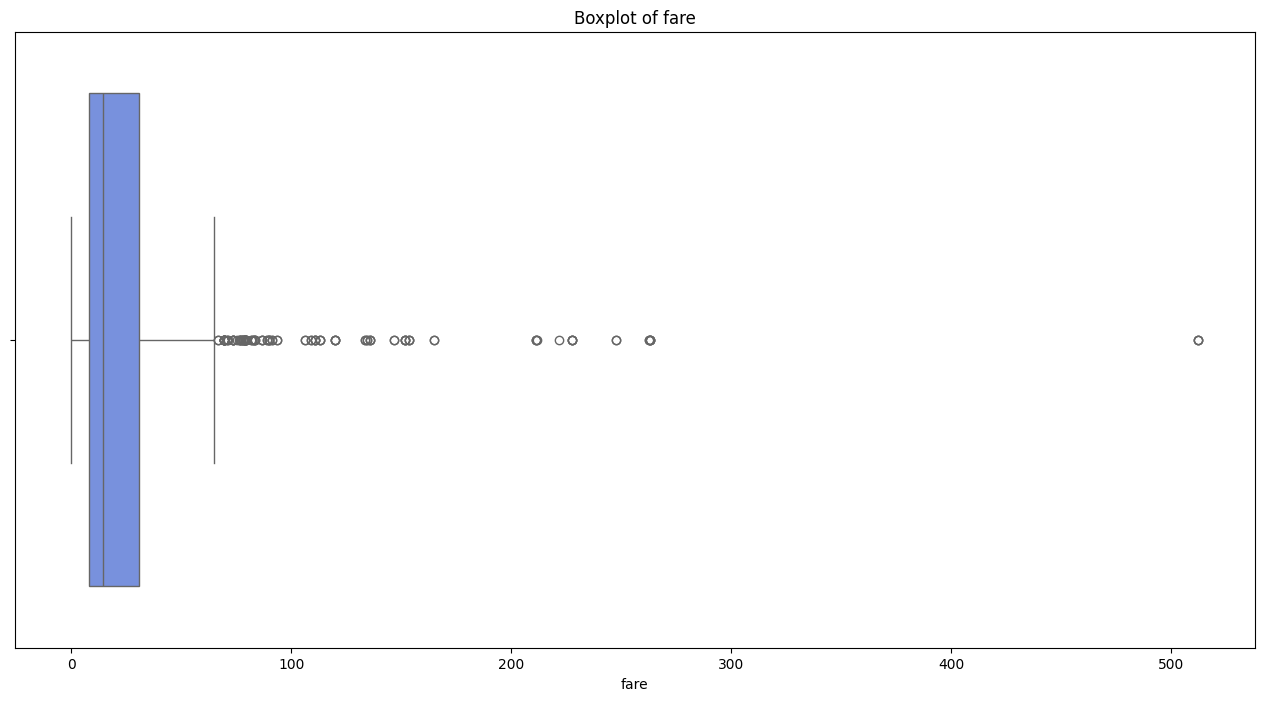

In [28]:
custom_pallete = "coolwarm"
sns.set_palette(custom_pallete)
for col in data.select_dtypes(include=["integer", "float"]).columns:
    fig, ax = plt.subplots(figsize = (16, 8))
    ax.set_title(f"Boxplot of {col}")
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)

##### d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

THAN DISINI KAMU BEBAS HAPUS OUTLIERNYA ATAU NGGAK TAPI MENURUTKU KALAU DIHAPUS JUGA NGGAK LOGIS SAMA KONDISI DATASETNYA

##### Encoding Data Kategorikal

In [29]:
# Mengecek feature yang tergolong dalam data kategorikal
for col in data.columns:
    if data[col].dtype == "object":
        print(data[col].value_counts())
        print("\n")

sex
male      575
female    312
Name: count, dtype: int64


embarked
S    643
C    168
Q     76
Name: count, dtype: int64


class
Third     489
First     214
Second    184
Name: count, dtype: int64


who
man      535
woman    269
child     83
Name: count, dtype: int64


embark_town
Southampton    643
Cherbourg      168
Queenstown      76
Name: count, dtype: int64




One-Hot Encoding (OHE) → Untuk data yang tidak memiliki urutan.

* Kolom yang akan dikodekan dengan OneHotEncoder(): [alive, sex]

Label Encoding (LAB) → Untuk data kategorikal yang unik tanpa urutan.

* Kolom yang akan dikodekan dengan LabelEncoder(): [embark_town, who_embarked]

Ordinal Encoding (ORD) → Untuk data dengan urutan/hierarki.

* Kolom yang akan dikodekan dengan OrdinalEncoder() : [Class]

In [30]:
OHE_cols = ['sex', 'alone']
LAB_cols = ['embark_town', 'who', 'embarked']
ORD_cols = ['class']

# One-Hot Encoding
for col in OHE_cols:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_cols = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_cols,
                              columns=[f'{col}_{i}' for i in range(encoded_cols.shape[1])])
    data = pd.concat([data, encoded_df], axis = 1)
    data.drop(columns = [col], inplace=True)

# Label Encoding
for col in LAB_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Ordinal Encoding 
for col in ORD_cols:
    encoder = ce.OrdinalEncoder(cols=[col], handle_missing = 'return_nan')
    data[col] = encoder.fit_transform(data)[col]

In [32]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,sex_0,alone_0,alone_1
0,0.0,3.0,22.0,1.0,0.0,7.2500,2,1.0,1,2,1.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,2.0,2,0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,2,1.0,2,2,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,2,2.0,2,2,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,2,1.0,1,2,1.0,1.0,0.0


In [33]:
# Mengubah nama kolom
data.columns = ["survived","pclass","age","sibsp","parch","fare","embarked","class","who","embark_town",
              "male","alone","with someone"]

In [34]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,male,alone,with someone
0,0.0,3.0,22.0,1.0,0.0,7.2500,2,1.0,1,2,1.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,2.0,2,0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,2,1.0,2,2,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,2,2.0,2,2,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,2,1.0,1,2,1.0,1.0,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 827
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      887 non-null    float64
 1   pclass        887 non-null    float64
 2   age           887 non-null    float64
 3   sibsp         887 non-null    float64
 4   parch         887 non-null    float64
 5   fare          887 non-null    float64
 6   embarked      889 non-null    int32  
 7   class         887 non-null    float64
 8   who           889 non-null    int32  
 9   embark_town   889 non-null    int32  
 10  male          887 non-null    float64
 11  alone         889 non-null    float64
 12  with someone  889 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 86.8 KB


In [36]:
# Mengecek nilai kosong
data.isna().sum()

survived        2
pclass          2
age             2
sibsp           2
parch           2
fare            2
embarked        0
class           2
who             0
embark_town     0
male            2
alone           0
with someone    0
dtype: int64

In [37]:
# Menghapus nilai kosong
NA_Columns=["survived","pclass","age","sibsp","parch","fare","class","male"]
for col in NA_Columns:
        data = data.dropna(subset=[col])

In [38]:
# Mengecek ulang nilai kosong
data.isna().sum()

survived        0
pclass          0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
embark_town     0
male            0
alone           0
with someone    0
dtype: int64

In [39]:
# Menghapus data duplikat
data = data.drop_duplicates()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 886
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      824 non-null    float64
 1   pclass        824 non-null    float64
 2   age           824 non-null    float64
 3   sibsp         824 non-null    float64
 4   parch         824 non-null    float64
 5   fare          824 non-null    float64
 6   embarked      824 non-null    int32  
 7   class         824 non-null    float64
 8   who           824 non-null    int32  
 9   embark_town   824 non-null    int32  
 10  male          824 non-null    float64
 11  alone         824 non-null    float64
 12  with someone  824 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 80.5 KB


In [41]:
data.tail()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,male,alone,with someone
881,0.0,2.0,28.000000,0.0,0.0,10.500,2,3.0,1,2,0.0,0.0,0.0
883,0.0,3.0,39.000000,0.0,5.0,29.125,1,1.0,2,1,0.0,1.0,0.0
884,0.0,2.0,27.000000,0.0,0.0,13.000,2,3.0,1,2,0.0,0.0,0.0
885,1.0,1.0,19.000000,0.0,0.0,30.000,2,2.0,2,2,1.0,1.0,0.0
886,0.0,3.0,29.698696,1.0,2.0,23.450,2,1.0,2,2,1.0,1.0,0.0


##### Scaling Data

In [42]:
Features=data.drop(columns="survived")
Goal=data["survived"]

In [43]:
Features

,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,male,alone,with someone
0,3.0,22.000000,1.0,0.0,7.2500,2,1.0,1,2,1.0,0.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0,2.0,2,0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2,1.0,2,2,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2,2.0,2,2,0.0,0.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2,1.0,1,2,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,2.0,28.000000,0.0,0.0,10.5000,2,3.0,1,2,0.0,0.0,0.0
883,3.0,39.000000,0.0,5.0,29.1250,1,1.0,2,1,0.0,1.0,0.0
884,2.0,27.000000,0.0,0.0,13.0000,2,3.0,1,2,0.0,0.0,0.0
885,1.0,19.000000,0.0,0.0,30.0000,2,2.0,2,2,1.0,1.0,0.0


In [44]:
Features = StandardScaler().fit_transform(Features)

In [45]:
Features

array([[ 0.86117344, -0.57582789,  0.43245997, ...,  0.75664991,
        -1.20514769,  0.        ],
       [-1.50418295,  0.61708763,  0.43245997, ..., -1.32161517,
        -1.20514769,  0.        ],
       [ 0.86117344, -0.27759901, -0.50038562, ..., -1.32161517,
         0.82977382,  0.        ],
       ...,
       [-0.32150475, -0.20304179, -0.50038562, ..., -1.32161517,
        -1.20514769,  0.        ],
       [-1.50418295, -0.79949955, -0.50038562, ...,  0.75664991,
         0.82977382,  0.        ],
       [ 0.86117344, -0.00183454,  0.43245997, ...,  0.75664991,
         0.82977382,  0.        ]])

In [46]:
Features = pd.DataFrame(Features)

In [47]:
Features

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.861173,-0.575828,0.432460,-0.490542,-0.517779,0.582323,-0.851276,-0.351416,0.582323,0.756650,-1.205148,0.0
1,-1.504183,0.617088,0.432460,-0.490542,0.734913,-1.923339,0.399083,1.293849,-1.923339,-1.321615,-1.205148,0.0
2,0.861173,-0.277599,-0.500386,-0.490542,-0.504574,0.582323,-0.851276,1.293849,0.582323,-1.321615,0.829774,0.0
3,-1.504183,0.393416,0.432460,-0.490542,0.379191,0.582323,0.399083,1.293849,0.582323,-1.321615,-1.205148,0.0
4,0.861173,0.393416,-0.500386,-0.490542,-0.502129,0.582323,-0.851276,-0.351416,0.582323,0.756650,0.829774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.321505,-0.128485,-0.500386,-0.490542,-0.454199,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
820,0.861173,0.691645,-0.500386,5.560461,-0.089836,-0.670508,-0.851276,1.293849,-0.670508,-1.321615,0.829774,0.0
821,-0.321505,-0.203042,-0.500386,-0.490542,-0.405291,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
822,-1.504183,-0.799500,-0.500386,-0.490542,-0.072718,0.582323,0.399083,1.293849,0.582323,0.756650,0.829774,0.0


In [49]:
Features.columns=["pclass","age","sibsp","parch","fare","embarked","class","who","embark_town",
              "male","alone","with someone"]

In [48]:
Features

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.861173,-0.575828,0.432460,-0.490542,-0.517779,0.582323,-0.851276,-0.351416,0.582323,0.756650,-1.205148,0.0
1,-1.504183,0.617088,0.432460,-0.490542,0.734913,-1.923339,0.399083,1.293849,-1.923339,-1.321615,-1.205148,0.0
2,0.861173,-0.277599,-0.500386,-0.490542,-0.504574,0.582323,-0.851276,1.293849,0.582323,-1.321615,0.829774,0.0
3,-1.504183,0.393416,0.432460,-0.490542,0.379191,0.582323,0.399083,1.293849,0.582323,-1.321615,-1.205148,0.0
4,0.861173,0.393416,-0.500386,-0.490542,-0.502129,0.582323,-0.851276,-0.351416,0.582323,0.756650,0.829774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.321505,-0.128485,-0.500386,-0.490542,-0.454199,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
820,0.861173,0.691645,-0.500386,5.560461,-0.089836,-0.670508,-0.851276,1.293849,-0.670508,-1.321615,0.829774,0.0
821,-0.321505,-0.203042,-0.500386,-0.490542,-0.405291,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
822,-1.504183,-0.799500,-0.500386,-0.490542,-0.072718,0.582323,0.399083,1.293849,0.582323,0.756650,0.829774,0.0


In [50]:
Goal

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
881    0.0
883    0.0
884    0.0
885    1.0
886    0.0
Name: survived, Length: 824, dtype: float64

In [51]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        824 non-null    float64
 1   age           824 non-null    float64
 2   sibsp         824 non-null    float64
 3   parch         824 non-null    float64
 4   fare          824 non-null    float64
 5   embarked      824 non-null    float64
 6   class         824 non-null    float64
 7   who           824 non-null    float64
 8   embark_town   824 non-null    float64
 9   male          824 non-null    float64
 10  alone         824 non-null    float64
 11  with someone  824 non-null    float64
dtypes: float64(12)
memory usage: 77.4 KB


### 3. Modelling

##### a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

Splitting Train And Test Groups :

##### b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

In [52]:
Ftrain, Ftest, Gtrain, Gtest = train_test_split(Features, Goal, test_size= 0.1, random_state=42)

##### c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya

##### Model Logistic Regression

Menggunakan Gridsearch untuk Mencari nilai Optimal Model Logistic Regression

In [41]:
LR_params = {'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
             'dual' : [True, False],
             'tol' : [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
             'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

LR = LogisticRegression()
GRS = GridSearchCV(LR, LR_params, cv=5)
GRS.fit(Ftrain, Gtrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l2', 'solver': 'saga', 'tol': 10000.0}
0.7543533466352258


Membuat prediksi

In [42]:
LR = LogisticRegression(dual=False, penalty='l2', solver='sag', tol=1000.0)
LR.fit(Ftrain,Gtrain)
LR_predict = LR.predict(Ftest)
LR_predict_train = LR.predict(Ftrain)

In [43]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,LR_predict),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,LR_predict_train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.68      0.85      0.75        47
         1.0       0.71      0.47      0.57        36

    accuracy                           0.69        83
   macro avg       0.69      0.66      0.66        83
weighted avg       0.69      0.69      0.67        83
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       448
         1.0       0.72      0.59      0.65       293

    accuracy                           0.75       741
   macro avg       0.74      0.72      0.73       741
weighted avg       0.75      0.75      0.74       741
 




In [44]:
test_accuracy = accuracy_score(Gtest, LR_predict)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, LR_predict_train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.6867

Accuracy Score for the train group: 0.7490



[[40  7]
 [19 17]]


<Axes: >

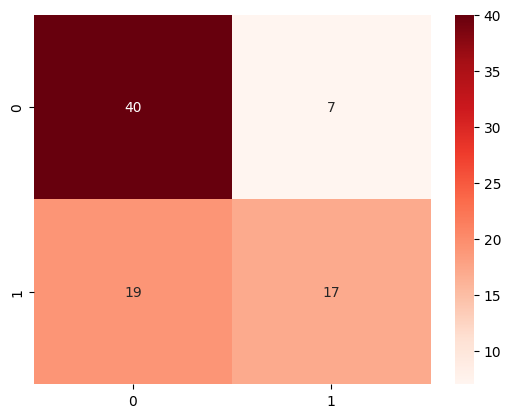

In [45]:
CM_LR = confusion_matrix(Gtest, LR_predict)
print(CM_LR)
sns.heatmap(CM_LR, annot= True, cmap= 'Reds')

##### Model Support Vector Machine

Applying GridSearch Model on SVM Classifier:

In [46]:
SVM_params = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'degree' : [2, 3, 4]
}

GRS = GridSearchCV(svm.SVC(), SVM_params, cv = 5)
GRS.fit(Ftrain, Gtrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.8070288409214583


In [47]:
SVM = svm.SVC(C=1, degree=2, gamma='scale', kernel='rbf')
SVM.fit(Ftrain, Gtrain)
SVM_Pred = SVM.predict(Ftest)
SVM_pred_train = SVM.predict(Ftrain)

In [48]:
print('classification Report untuk Grup Data Test : \n')
print(classification_report(Gtest, SVM_Pred), "\n\n")
print('Clasification Report untuk Grup Data Train: \n')
print(classification_report(Gtrain, SVM_pred_train), '\n\n')

classification Report untuk Grup Data Test : 

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77        47
         1.0       0.73      0.53      0.61        36

    accuracy                           0.71        83
   macro avg       0.72      0.69      0.69        83
weighted avg       0.71      0.71      0.70        83
 


Clasification Report untuk Grup Data Train: 

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       448
         1.0       0.88      0.70      0.78       293

    accuracy                           0.84       741
   macro avg       0.85      0.82      0.83       741
weighted avg       0.85      0.84      0.84       741
 




In [49]:
test_accuracy = accuracy_score(Gtest, SVM_Pred)
print(f"Skor Akurasi untuk grup data tes adalah: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, SVM_pred_train)
print(f"Skor Akurasi untuk grup data train adalah: {train_accuracy:.4f}\n")

Skor Akurasi untuk grup data tes adalah: 0.7108

Skor Akurasi untuk grup data train adalah: 0.8435



[[40  7]
 [17 19]]


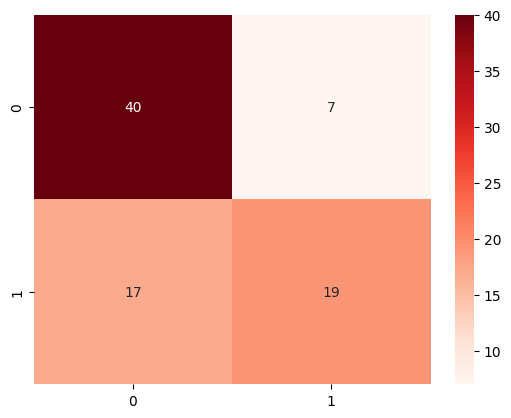

In [50]:
CM_SVM = confusion_matrix(Gtest, SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM, annot=True, cmap='Reds')
plt.show()

##### Model CatBoost Model

Applying GridSearch Model on  CatBoost Model:

In [51]:
CB_params = {
    'learning_rate' : [0.05, 0.1],
    'depth' : [3, 5, 7],
    'iterations' : [100, 200, 250],
    'bagging_temperature' : [0.5, 1.0]
}

CB = CatBoostClassifier()
GRS = GridSearchCV(CB, CB_params, cv = 5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

0:	learn: 0.6762746	total: 160ms	remaining: 15.8s
1:	learn: 0.6579026	total: 162ms	remaining: 7.93s
2:	learn: 0.6408140	total: 164ms	remaining: 5.29s
3:	learn: 0.6267364	total: 165ms	remaining: 3.97s
4:	learn: 0.6153297	total: 167ms	remaining: 3.17s
5:	learn: 0.6060291	total: 168ms	remaining: 2.64s
6:	learn: 0.5978343	total: 170ms	remaining: 2.26s
7:	learn: 0.5859666	total: 172ms	remaining: 1.98s
8:	learn: 0.5765232	total: 173ms	remaining: 1.75s
9:	learn: 0.5670924	total: 176ms	remaining: 1.58s
10:	learn: 0.5609671	total: 177ms	remaining: 1.43s
11:	learn: 0.5536943	total: 179ms	remaining: 1.31s
12:	learn: 0.5447603	total: 180ms	remaining: 1.21s
13:	learn: 0.5375626	total: 182ms	remaining: 1.11s
14:	learn: 0.5312431	total: 183ms	remaining: 1.04s
15:	learn: 0.5258498	total: 185ms	remaining: 970ms
16:	learn: 0.5188884	total: 187ms	remaining: 911ms
17:	learn: 0.5124263	total: 189ms	remaining: 859ms
18:	learn: 0.5083594	total: 191ms	remaining: 814ms
19:	learn: 0.5026428	total: 193ms	remaini

In [52]:
CB = CatBoostClassifier(bagging_temperature = 0.5, depth=5, iterations = 300, learning_rate=0.05)
CB.fit(Ftrain, Gtrain)
CB_Pred = CB.predict(Ftest)
CB_Pred_Train = CB.predict(Ftrain)

0:	learn: 0.6566139	total: 8.92ms	remaining: 2.67s
1:	learn: 0.6283023	total: 14.7ms	remaining: 2.19s
2:	learn: 0.6041024	total: 20.4ms	remaining: 2.02s
3:	learn: 0.5831830	total: 25.9ms	remaining: 1.91s
4:	learn: 0.5621361	total: 31.3ms	remaining: 1.85s
5:	learn: 0.5449217	total: 36.4ms	remaining: 1.78s
6:	learn: 0.5322016	total: 41.1ms	remaining: 1.72s
7:	learn: 0.5197202	total: 48ms	remaining: 1.75s
8:	learn: 0.5111820	total: 52ms	remaining: 1.68s
9:	learn: 0.4997884	total: 57.4ms	remaining: 1.67s
10:	learn: 0.4892769	total: 64ms	remaining: 1.68s
11:	learn: 0.4819152	total: 69.9ms	remaining: 1.68s
12:	learn: 0.4725138	total: 75.4ms	remaining: 1.67s
13:	learn: 0.4638243	total: 81ms	remaining: 1.65s
14:	learn: 0.4567741	total: 85.6ms	remaining: 1.63s
15:	learn: 0.4523943	total: 90.5ms	remaining: 1.6s
16:	learn: 0.4470574	total: 95.6ms	remaining: 1.59s
17:	learn: 0.4421434	total: 101ms	remaining: 1.58s
18:	learn: 0.4363943	total: 106ms	remaining: 1.57s
19:	learn: 0.4327876	total: 112ms

In [54]:
print('Clasification Report for the test group : \n')
print(classification_report(Gtest, CB_Pred), '\n\n')
print('Clasification Report for the train group (to check if there is any overfitting): \n')
print(classification_report(Gtrain, CB_Pred_Train), '\n\n')

Clasification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80        47
         1.0       0.83      0.53      0.64        36

    accuracy                           0.75        83
   macro avg       0.77      0.72      0.72        83
weighted avg       0.76      0.75      0.73        83
 


Clasification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       448
         1.0       0.93      0.86      0.90       293

    accuracy                           0.92       741
   macro avg       0.92      0.91      0.92       741
weighted avg       0.92      0.92      0.92       741
 




In [55]:
test_accuracy = accuracy_score(Gtest, CB_Pred)
print(f"Skor Akurasi untuk grup data test: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, CB_Pred_Train)
print(f"Skor Akurasi untuk grup data train: {train_accuracy:.4f}\n")

Skor Akurasi untuk grup data test: 0.7470

Skor Akurasi untuk grup data train: 0.9217



[[43  4]
 [17 19]]


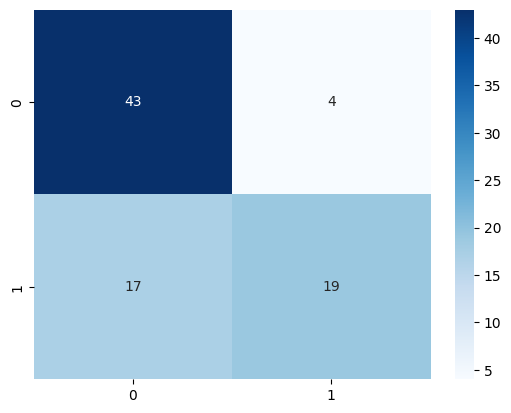

In [56]:
CM_CB = confusion_matrix(Gtest, CB_Pred)
print(CM_CB)
sns.heatmap(CM_CB, annot=True, cmap = 'Blues')
plt.show()

##### d. Berapa nilai evaluasi dari masing masing model pada data uji? Apa arti dari masing masing metrik evaluasi tersebut?

##### e. Bandingkan hasil dari ketiga algortima tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi data anda dengan baik?